# Hands-on ML Final Project

In [359]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## State of art

## Dataset Analysis

### Load dataset

In [360]:
data_dir = "./data/chest_xray/"
TRAIN_PATH = 'train'
TEST_PATH = 'test'

In [361]:
train_path = os.path.join(data_dir,TRAIN_PATH)
test_path=os.path.join(data_dir,TEST_PATH)

In [362]:
train_images_paths = os.listdir(os.path.join(train_path,'NORMAL')) + os.listdir(os.path.join(train_path,'PNEUMONIA'))
test_images_paths = os.listdir(os.path.join(test_path,'NORMAL'))+ os.listdir(os.path.join(test_path,'PNEUMONIA'))
len(train_images_paths), len(test_images_paths)

(5232, 624)

In [363]:
# function to assign labels to images
def parse_pictures_to_label(images):
    labels = []
    for image in images:
        image = image.split('.')[0]
        if image.startswith('NORMAL') or image.startswith('IM'):
            labels.append(0)
        else:
            image = image.split('_')[1]
            if image.startswith('virus'):
                labels.append(1)
            else:
                labels.append(2)
    return labels

In [364]:
train_labels = parse_pictures_to_label(train_images_paths)
test_labels = parse_pictures_to_label(test_images_paths)
len(train_labels), len(test_labels)

(5232, 624)

In [365]:
label_names = ["Normal", "Virus", "Bact"]
IMG_SIZE = 28

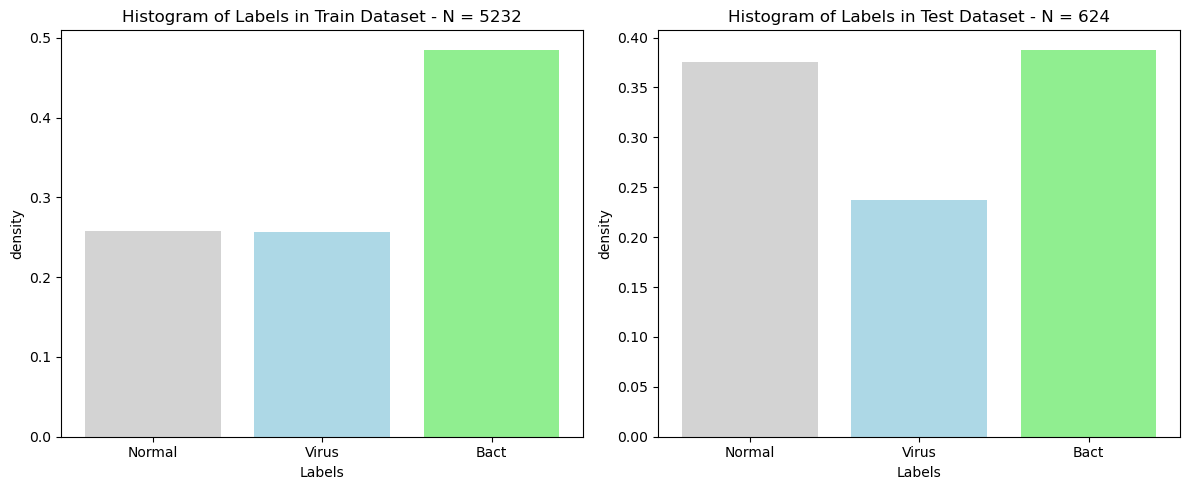

In [366]:
# bar plot of labels in train and dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
train_label_counts = [train_labels.count(0), train_labels.count(1), train_labels.count(2)]
train_label_density = [item/len(train_labels) for item in train_label_counts]
plt.bar(label_names, train_label_density, color = ['lightgray', 'lightblue', 'lightgreen'])
plt.xlabel("Labels")
plt.ylabel("density")
plt.title(f"Histogram of Labels in Train Dataset - N = {len(train_labels)}")
plt.subplot(1,2,2)
test_label_counts = [test_labels.count(0), test_labels.count(1), test_labels.count(2)]
test_label_density = [item/len(test_labels) for item in label_counts]
plt.bar(label_names, test_label_density, color = ['lightgray', 'lightblue', 'lightgreen'])
plt.xlabel("Labels")
plt.ylabel("density")
plt.title(f"Histogram of Labels in Test Dataset - N = {len(test_labels)}")
plt.tight_layout()
plt.show()

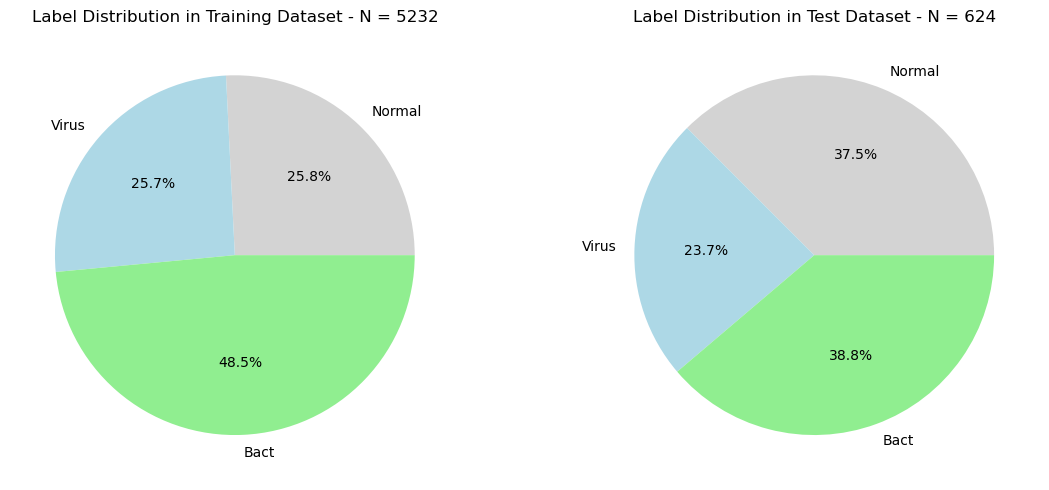

In [367]:
# Create pie plots for training and test datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(train_label_density, labels=label_names, colors=['lightgray', 'lightblue', 'lightgreen'], autopct='%1.1f%%')
plt.title(f"Label Distribution in Training Dataset - N = {len(train_labels)}")

plt.subplot(1, 2, 2)
plt.pie(test_label_density, labels=label_names, colors=['lightgray', 'lightblue', 'lightgreen'], autopct='%1.1f%%')
plt.title(f"Label Distribution in Test Dataset - N = {len(test_labels)}")

plt.tight_layout()
plt.show()


AGREGAR COMENTARIO SOBRE EL DESBALANCE DE LOS DATOS

In [368]:
# load images and resize them to IMG_SIZE*IMG_SIZE
mask_train = ["NORMAL"]*train_labels.count(0) + ["PNEUMONIA"]*(len(train_labels) - train_labels.count(0))
mask_test = ["NORMAL"]*test_labels.count(0) + ["PNEUMONIA"]*(len(test_labels) - test_labels.count(0))

train_images_paths = [os.path.join(train_path,mask_train[i],train_images_paths[i]) for i in range(len(train_images_paths))]
test_images_paths = [os.path.join(test_path,mask_test[i],test_images_paths[i]) for i in range(len(test_images_paths))]

def load_images(images_paths):
    images = []
    for image_path in images_paths:
        image = cv2.imread(image_path)
        # resize image
        image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
        # transform to grayscale
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        images.append(image)
    # reshape images to 1D array
    images = np.array(images).reshape(-1,IMG_SIZE*IMG_SIZE)
    return images

train_images = load_images(train_images_paths)
test_images = load_images(test_images_paths)
train_images.shape, test_images.shape

((5232, 784), (624, 784))

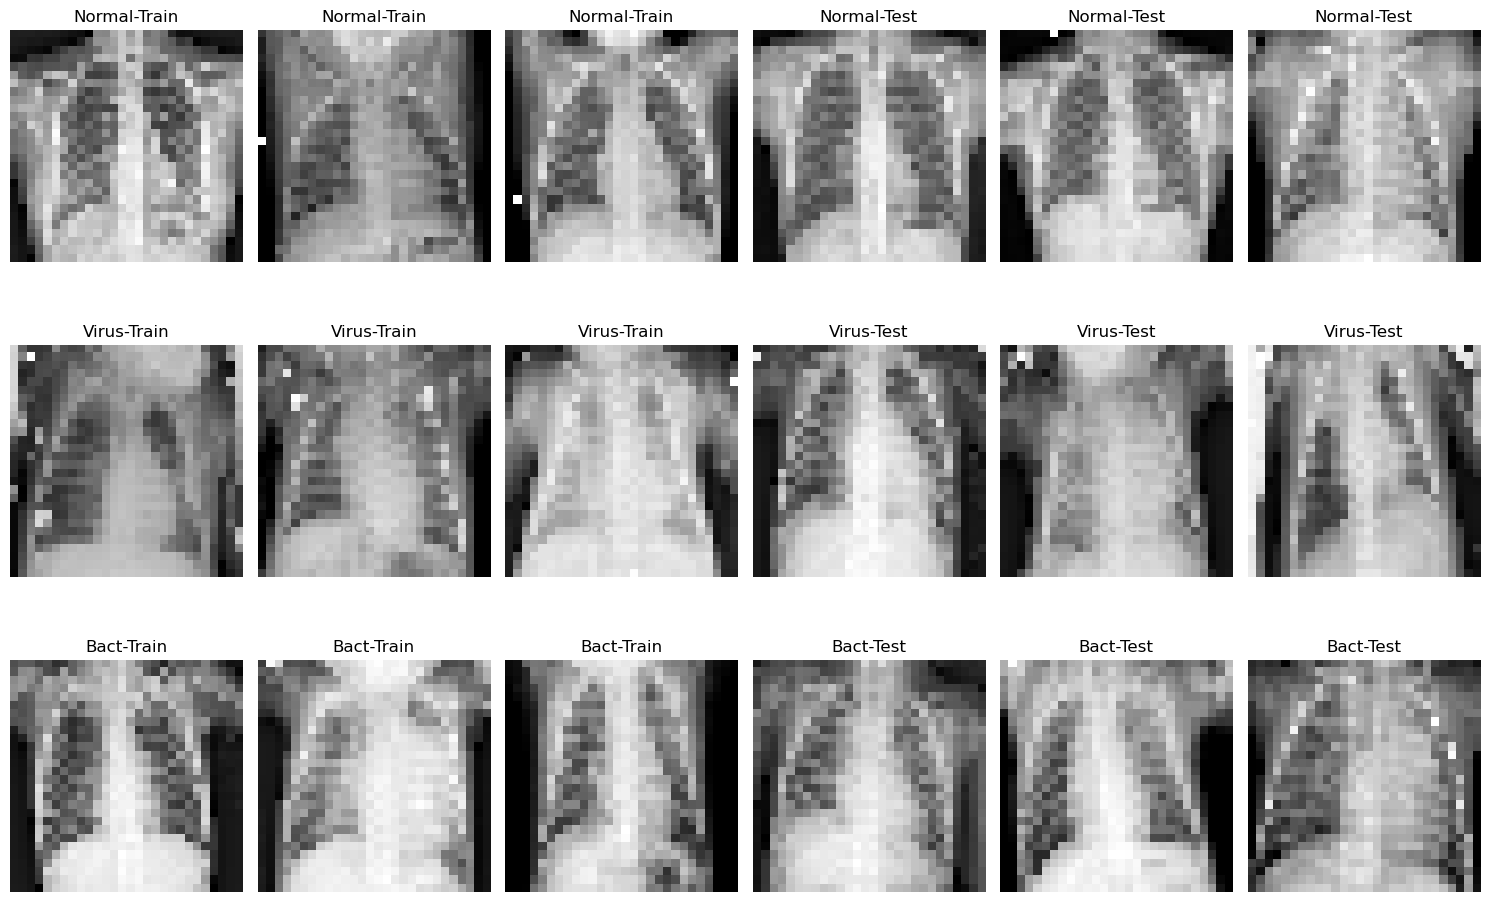

In [370]:
# show three images from each class in training and test dataset
# save 3 images from each class in training and test dataset
normal_train_images = train_images[:3]
virus_train_images = train_images[train_label_counts[0]:train_label_counts[0]+3]
bact_train_images = train_images[train_label_counts[0]+train_label_counts[1]:train_label_counts[0]+train_label_counts[1]+3]
normal_test_images = test_images[:3]
virus_test_images = test_images[test_label_counts[0]:test_label_counts[0]+3]
bact_test_images = test_images[test_label_counts[0]+test_label_counts[1]:test_label_counts[0]+test_label_counts[1]+3]


def show_images(subplot_indexes, images, label, mode = 'Train'):
    i,j_o = subplot_indexes
    for j in range(j_o,j_o+3):
        axes[i,j].imshow(images[j-j_o].reshape(IMG_SIZE,IMG_SIZE),cmap='gray')
        axes[i,j].axis('off')
        axes[i,j].set_title(label+ '-' + mode)


fig,axes = plt.subplots(3,6)
fig.set_size_inches(15,10)

show_images((0,0),normal_train_images,'Normal')
show_images((0,3),normal_test_images,'Normal',mode='Test')
show_images((1,0),virus_train_images,'Virus')
show_images((1,3),virus_test_images,'Virus',mode='Test')
show_images((2,0),bact_train_images,'Bact')
show_images((2,3),bact_test_images,'Bact',mode='Test')

plt.tight_layout()
plt.show()

In [270]:
# train_images_np = np.array(train_images)
# test_images_np = np.array(test_images)
# train_images_np.shape,test_images_np.shape

((5232, 28, 28), (624, 28, 28))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5232 samples in 0.003s...
[t-SNE] Computed neighbors for 5232 samples in 0.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5232
[t-SNE] Computed conditional probabilities for sample 2000 / 5232
[t-SNE] Computed conditional probabilities for sample 3000 / 5232
[t-SNE] Computed conditional probabilities for sample 4000 / 5232
[t-SNE] Computed conditional probabilities for sample 5000 / 5232
[t-SNE] Computed conditional probabilities for sample 5232 / 5232
[t-SNE] Mean sigma: 276.536897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.049591
[t-SNE] KL divergence after 300 iterations: 2.650826


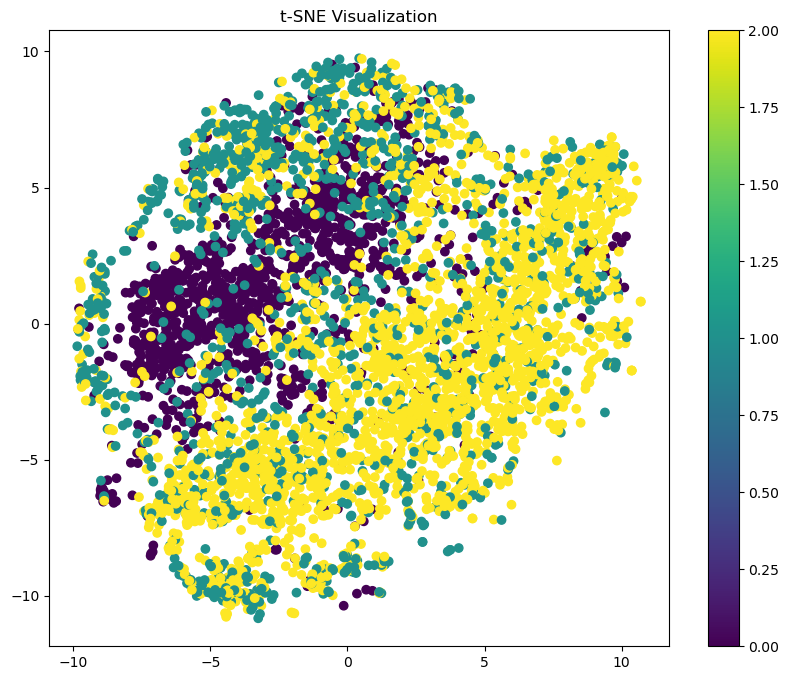

In [374]:
# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=42, verbose=1, perplexity=40, n_iter=300, init='random', learning_rate=200)

# Fit and transform the data
X_tsne = tsne.fit_transform(train_images)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_labels, cmap='viridis')
plt.colorbar()

plt.title('t-SNE Visualization')
plt.show()

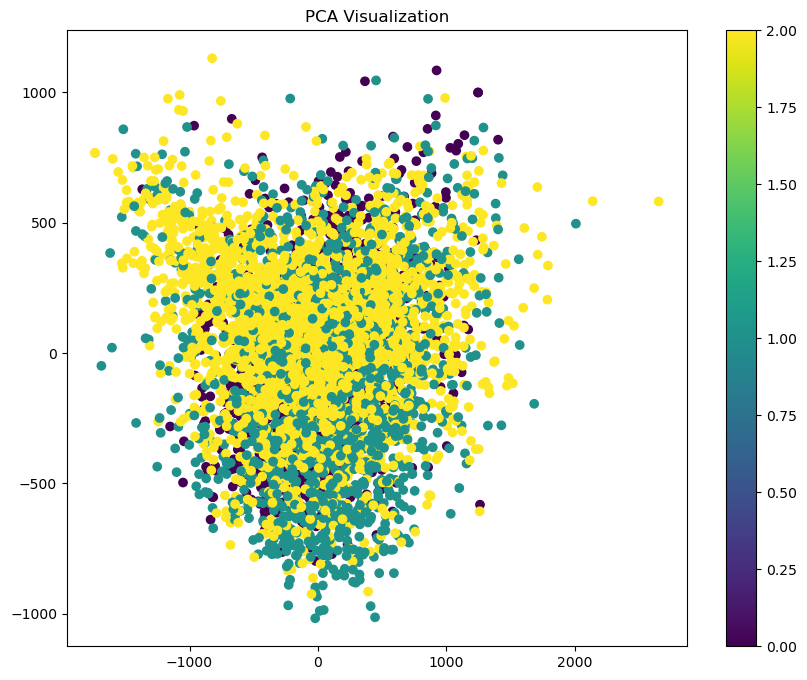

In [375]:
# visualize data using PCA

# Create a PCA instance
pca = PCA(n_components=2)
# Fit the PCA instance to the scaled samples
pca.fit(train_images)
# Transform the scaled samples: pca_features
pca_features = pca.transform(train_images)
# Plot the points using the classes as colors
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=train_labels, cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization')
plt.show()

### Baseline model

In [376]:
# Baseline Model implementation
class BaselineModel:
    def __init__(self, labels):
        self.labels = labels
        self.means = np.zeros((len(labels), IMG_SIZE*IMG_SIZE))
        pass

    def fit(self, X, y):
        # calculate the "mean image" of each class
        for i in range(len(self.labels)):
            self.means[i] = np.mean(X[y == i, :], axis=0)
        pass

    def predict(self, X):
        # calculate the distance between each sample and each class mean and assign the 
        # class with the smallest norm2 distance
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            norms = np.linalg.norm(self.means - X[i], axis=1)
            y_pred[i] = np.argmin(norms)
        return y_pred

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

#### Binary Classification: Normal vs Pneumonia

In [377]:
# train the baseline model
baseline = BaselineModel(labels=[0, 1])
train_labels = np.where(np.array(train_labels) == 0, 0, 1)
test_labels = np.where(np.array(test_labels) == 0, 0, 1)
baseline.fit(train_images, train_labels)
baseline.means.shape

(2, 784)

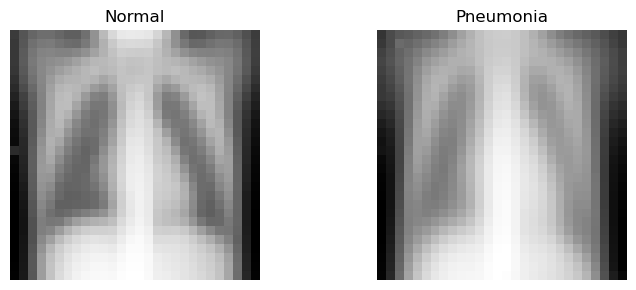

In [379]:
# visualize the mean images of each class
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(8, 3)
axes[0].imshow(baseline.means[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
axes[0].axis('off')
axes[0].set_title('Normal')
axes[1].imshow(baseline.means[1].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
axes[1].axis('off')
axes[1].set_title('Pneumonia')
plt.tight_layout()
plt.show()

In [381]:
# evaluate the baseline model on the train dataset
print(classification_report(train_labels, baseline.predict(train_images), target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.69      0.87      0.77      1349
   Pneumonia       0.95      0.87      0.91      3883

    accuracy                           0.87      5232
   macro avg       0.82      0.87      0.84      5232
weighted avg       0.88      0.87      0.87      5232



In [382]:
# evaluate the baseline model on the test dataset
print(classification_report(test_labels, baseline.predict(test_images), target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.75      0.77      0.76       234
   Pneumonia       0.86      0.85      0.85       390

    accuracy                           0.82       624
   macro avg       0.80      0.81      0.81       624
weighted avg       0.82      0.82      0.82       624

